In [3]:
from pathlib import Path
from datatools.fixture import setup_dummy_data

source = "./tool-tracking-data/"

In [4]:
from datatools import MeasurementDataReader, Measurement, MeasurementSeries, Action
mdr = MeasurementDataReader(source=source)

In [5]:
from datatools import Tool, Config, MeasurementSeries, Measurement, DataTypes, Action

mytool = "electric_screwdriver"
# mytool = "pneumatic_screwdriver"
# mytool = "pneumatic_rivet_gun"

In [6]:
import numpy as np
from seglearn.base import TS_Data
from seglearn.pipe import Pype
from fhgutils import Segment, contextual_recarray_dtype, filter_ts_data
from datatools import to_ts_data

In [5]:
# class_label_dict = mdr.query(query_type=Action).filter_by(Tool == mytool).get()

In [6]:
# # Create a mapping of labels to class names
# # This assumes that the data_dict contains a list of dictionaries with 'classes' keys
# label_class_map = {}

# for action, data in class_label_dict.items():
#     if isinstance(data, list):
#         for entry in data:
#             if 'classes' in entry:
#                 for label, class_name in entry['classes'].items():
#                     label_class_map[label] = class_name

# # Display the mappings
# for label, class_name in sorted(label_class_map.items()):
#     print(f"{label}: {class_name}")

In [7]:
window_length=0.4 # unit in s
overlap = 0.5 # unit in percent

# clean and window data
data_dict = mdr.query().filter_by(Tool == mytool).get()
Xt, Xc, y = to_ts_data(data_dict, contextual_recarray_dtype)

X = TS_Data(Xt, Xc)
pipe = Pype([
    ('segment', Segment(window_length=window_length, overlap=overlap, enforce_size=True, n=len(np.unique(Xc.desc))))
])

print('###############################################')
print("Number of sequences:", len(X.ts_data))
for i, seq in enumerate(X.ts_data):
    print(f"Sequence {i}: Type = {type(seq)}, Shape = {np.shape(seq)}")


X_trans, y_trans = pipe.fit_transform(X, y)

[INFO] Preparing data from:
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716
  tool-tracking-data\electric_screwdriver\pythagoras-10-20200716


[INFO] Read data:   0%|          | 0/16 [00:00<?, ?it/s]

[INFO] Read data:   6%|▋         | 1/16 [00:00<00:01,  8.15it/s, file=ACC-01-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-01-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-02-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  19%|█▉        | 3/16 [00:00<00:00, 14.02it/s, file=ACC-03-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\ACC-04-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-01-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  38%|███▊      | 6/16 [00:00<00:00, 18.35it/s, file=GYR-02-102.291.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-02-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-03-102.291.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\GYR-04-102.291.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  56%|█████▋    | 9/16 [00:00<00:00, 21.40it/s, file=MAG-01-155.087.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-01-155.087.csv) and from the timestamps differ by 0.001Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-02-154.679.csv) and from the timestamps differ by 0.001Hz



[INFO] Read data:  75%|███████▌  | 12/16 [00:00<00:00, 20.44it/s, file=MAG-04-154.967.csv]

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-03-154.871.csv) and from the timestamps differ by 0.002Hz

[WARN] The mean sampling rate from the filename (tool-tracking-data\electric_screwdriver\pythagoras-10-20200716\MAG-04-154.967.csv) and from the timestamps differ by 0.001Hz



[INFO] Read annotation: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s, file=data-04.annotation]


[INFO] Finished with 4 measurement(s).
###############################################
Number of sequences: 16
Sequence 0: Type = <class 'numpy.ndarray'>, Shape = (41775, 4)
Sequence 1: Type = <class 'numpy.ndarray'>, Shape = (41775, 4)
Sequence 2: Type = <class 'numpy.ndarray'>, Shape = (63336, 4)
Sequence 3: Type = <class 'numpy.ndarray'>, Shape = (3267040, 2)
Sequence 4: Type = <class 'numpy.ndarray'>, Shape = (41439, 4)
Sequence 5: Type = <class 'numpy.ndarray'>, Shape = (41439, 4)
Sequence 6: Type = <class 'numpy.ndarray'>, Shape = (62658, 4)
Sequence 7: Type = <class 'numpy.ndarray'>, Shape = (3240640, 2)
Sequence 8: Type = <class 'numpy.ndarray'>, Shape = (33620, 4)
Sequence 9: Type = <class 'numpy.ndarray'>, Shape = (33620, 4)
Sequence 10: Type = <class 'numpy.ndarray'>, Shape = (50902, 4)
Sequence 11: Type = <class 'numpy.ndarray'>, Shape = (2629280, 2)
Sequence 12: Type = <class 'numpy.ndarray'>, Shape = (31927, 4)
Sequence 13: Type = <class 'numpy.ndarray'>, Shape = (31927, 

### To get the class and corresponding labels

In [8]:
# for i in range(1,5):
#     print(data_dict[f"0{i}"]["classes"])
print(data_dict["01"]["classes"])

{5: 'motor_activity_ccw', 6: 'manual_motor_rotation', 4: 'motor_activity_cw', 7: 'shaking', 2: 'tightening', 8: 'undefined', 3: 'untightening', 14: 'tightening_double'}


In [9]:
# Remove the microphone channel

print("[INFO] extract segmented ACC data")
Xt_acc, Xc_acc, y_acc = filter_ts_data(X_trans, y_trans, filt={'desc': ['acc']})

print("[INFO] extract segmented GYR data")
Xt_gyr, Xc_gyr, y_gyr = filter_ts_data(X_trans, y_trans, filt={'desc': ['gyr']})

print("[INFO] extract segmented MAG data")
Xt_mag, Xc_mag, y_mag = filter_ts_data(X_trans, y_trans, filt={'desc': ['mag']})

print("[INFO] extract segmented MIC data")
Xt_mic, Xc_mic, y_mic = filter_ts_data(X_trans, y_trans, filt={'desc': ['mic']})


[INFO] extract segmented ACC data
[INFO] extract segmented GYR data
[INFO] extract segmented MAG data
[INFO] extract segmented MIC data


In [10]:
print("[INFO] shape of ACC data is", Xt_acc.shape)
print("[INFO] shape of GYR data is", Xt_gyr.shape)
print("[INFO] shape of MAG data is", Xt_mag.shape)
print("[INFO] shape of MIC data is", Xt_mic.shape)
print(f"[INFO] {Xt_gyr.shape[0]} windows with {Xt_gyr[0].shape[0]} sample each (time stamps and 3 axis gyroscope)")
print(f"[INFO] {Xt_acc.shape[0]} windows with {Xt_acc[0].shape[0]} sample each (time stamps and 3 axis accelerometer)")
print(f"[INFO] {Xt_mag.shape[0]} windows with {Xt_mag[0].shape[0]} sample each (time stamps and 3 axis magnetometer)")
print(f"[INFO] {Xt_mic.shape[0]} windows with {Xt_mic[0].shape[0]} sample each (time stamps and 1 axis microphone)")

[INFO] shape of ACC data is (7265,)
[INFO] shape of GYR data is (7265,)
[INFO] shape of MAG data is (7265,)
[INFO] shape of MIC data is (7265,)
[INFO] 7265 windows with 41 sample each (time stamps and 3 axis gyroscope)
[INFO] 7265 windows with 41 sample each (time stamps and 3 axis accelerometer)
[INFO] 7265 windows with 62 sample each (time stamps and 3 axis magnetometer)
[INFO] 7265 windows with 3200 sample each (time stamps and 1 axis microphone)


In [11]:
from fhgutils import filter_labels, one_label_per_window
from data_preprocessing import find_ambiguous_windows,remove_windows_by_indices

In [12]:
ambiguous_acc = find_ambiguous_windows(Xt_acc, Xc_acc, y_acc, name="ACC")
ambiguous_gyr = find_ambiguous_windows(Xt_gyr, Xc_gyr, y_gyr, name="GYR")
ambiguous_mag = find_ambiguous_windows(Xt_mag, Xc_mag, y_mag, name="MAG")
ambiguous_mic = find_ambiguous_windows(Xt_mic, Xc_mic, y_mic, name="MIC")

# Union of all ambiguous window indices - windows with no majority label
ambiguous_indices = set(ambiguous_acc) | set(ambiguous_gyr) | set(ambiguous_mag) | set(ambiguous_mic)

print(f"Number of all ambiguous window indices across 4 modalities: {len(ambiguous_indices)}")


[ACC] Checking for ambiguous windows...
[ACC] Found 6 ambiguous windows.
[GYR] Checking for ambiguous windows...
[GYR] Found 6 ambiguous windows.
[MAG] Checking for ambiguous windows...
[MAG] Found 46 ambiguous windows.
[MIC] Checking for ambiguous windows...
[MIC] Found 80 ambiguous windows.
Number of all ambiguous window indices across 4 modalities: 103


In [13]:
# To remove windows without majority label from all modalities
Xt_acc_f, Xc_acc_f, y_acc_f = remove_windows_by_indices(Xt_acc, Xc_acc, y_acc, ambiguous_indices)
Xt_gyr_f, Xc_gyr_f, y_gyr_f = remove_windows_by_indices(Xt_gyr, Xc_gyr, y_gyr, ambiguous_indices)
Xt_mag_f, Xc_mag_f, y_mag_f = remove_windows_by_indices(Xt_mag, Xc_mag, y_mag, ambiguous_indices)
Xt_mic_f, Xc_mic_f, y_mic_f = remove_windows_by_indices(Xt_mic, Xc_mic, y_mic, ambiguous_indices)

# Code to print the window incase of unequal samples per window, eg: incase MIC data for pneumatic screw driver
for k in range(len(y_mic_f)):
    for i in y_mic_f[k]:
        if i == -42:
            print(k)

[INFO] Xt shape: (7162,)
[INFO] y shape after processing: (7162, 41)
[INFO] Xt shape: (7162,)
[INFO] y shape after processing: (7162, 41)
[INFO] Xt shape: (7162,)
[INFO] y shape after processing: (7162, 62)
[INFO] Xt shape: (7162,)
[INFO] y shape after processing: (7162, 3200)


In [14]:
y_acc_f = one_label_per_window(y_acc_f)
y_gyr_f = one_label_per_window(y_gyr_f)
y_mag_f = one_label_per_window(y_mag_f)
y_mic_f = one_label_per_window(y_mic_f)
# Print y_mic_f
print("-----------------------------------------------")
print(f"[ACC] Number of windows after removing ambiguous window indices: {len(y_acc_f)}")
print(f"[GYR] Number of windows after removing ambiguous window indices: {len(y_gyr_f)}")
print(f"[MAG] Number of windows after removing ambiguous window indices: {len(y_mag_f)}")
print(f"[MIC] Number of windows after removing ambiguous window indices: {len(y_mic_f)}")




Below find the number of unique labels in the data
flattened 8 labels: [ 2  3  4  5  6  7  8 14]
Below find the number of unique labels in the data
flattened 8 labels: [ 2  3  4  5  6  7  8 14]
Below find the number of unique labels in the data
flattened 8 labels: [ 2  3  4  5  6  7  8 14]
Below find the number of unique labels in the data
flattened 8 labels: [ 2  3  4  5  6  7  8 14]
-----------------------------------------------
[ACC] Number of windows after removing ambiguous window indices: 7162
[GYR] Number of windows after removing ambiguous window indices: 7162
[MAG] Number of windows after removing ambiguous window indices: 7162
[MIC] Number of windows after removing ambiguous window indices: 7162


In [15]:
inconsistent_indices = [
    i for i in range(len(y_acc_f))
    if not (y_acc_f[i] == y_gyr_f[i] == y_mag_f[i] == y_mic_f[i])
]
print(f"The number of mismatched windows before removing across 4 modalities: {len(inconsistent_indices)}")

Xt_acc_f, Xc_acc_f, y_acc_f = remove_windows_by_indices(Xt_acc_f, Xc_acc_f, y_acc_f, inconsistent_indices)
Xt_gyr_f, Xc_gyr_f, y_gyr_f = remove_windows_by_indices(Xt_gyr_f, Xc_gyr_f, y_gyr_f, inconsistent_indices)
Xt_mag_f, Xc_mag_f, y_mag_f = remove_windows_by_indices(Xt_mag_f, Xc_mag_f, y_mag_f, inconsistent_indices)
Xt_mic_f, Xc_mic_f, y_mic_f = remove_windows_by_indices(Xt_mic_f, Xc_mic_f, y_mic_f, inconsistent_indices)

inconsistent_indices = [
    i for i in range(len(y_acc_f))
    if not (y_acc_f[i] == y_gyr_f[i] == y_mag_f[i] == y_mic_f[i])
]
print(f"The number of mismatched windows after removing across 4 modalities (should be zero): {len(inconsistent_indices)}")

print("-----------------------------------------------")
print(f"[ACC] Number of windows after removing mismatched window indices: {len(y_acc_f)}")
print(f"[GYR] Number of windows after removing mismatched window indices: {len(y_gyr_f)}")
print(f"[MAG] Number of windows after removing mismatched window indices: {len(y_mag_f)}")
print(f"[MIC] Number of windows after removing mismatched window indices: {len(y_mic_f)}")

print(y_mic_f[5568])


The number of mismatched windows before removing across 4 modalities: 21
[INFO] Xt shape: (7141,)
[INFO] y shape after processing: (7141,)
[INFO] Xt shape: (7141,)
[INFO] y shape after processing: (7141,)
[INFO] Xt shape: (7141,)
[INFO] y shape after processing: (7141,)
[INFO] Xt shape: (7141,)
[INFO] y shape after processing: (7141,)
The number of mismatched windows after removing across 4 modalities (should be zero): 0
-----------------------------------------------
[ACC] Number of windows after removing mismatched window indices: 7141
[GYR] Number of windows after removing mismatched window indices: 7141
[MAG] Number of windows after removing mismatched window indices: 7141
[MIC] Number of windows after removing mismatched window indices: 7141
4


In [16]:
# import pandas as pd
# from datetime import datetime, timezone

# # Function to format timestamp as a readable string
# def format_timestamp(ts):
#     return datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]

# # Collect data for all windows
# window_data = []

# for i in range(len(Xt_acc_f)):
#     start_ts = Xt_acc_f[i][0][0]
#     end_ts = Xt_acc_f[i][-1][0]
#     duration = end_ts - start_ts

#     window_data.append({
#         "Window": i,
#         "Start_Timestamp": start_ts,
#         "End_Timestamp": end_ts,
#         "Start_Time_UTC": format_timestamp(start_ts),
#         "End_Time_UTC": format_timestamp(end_ts),
#         "Duration_sec": round(duration, 4),
#         "label": y_acc_f[i]
#     })

# # Create DataFrame and save to CSV
# df = pd.DataFrame(window_data)
# csv_path = "filtered_accelerometer_window_times.csv"
# df.to_csv(csv_path, index=False)

# print(f"[INFO] Saved window timestamp data to {csv_path}")


In [16]:
# To get the unique lables and their counts

# For Accelerometer
unique_acc, counts_acc = np.unique(y_acc_f, return_counts=True)
print("[ACC] Unique labels and their counts:")
for label, count in zip(unique_acc, counts_acc):
    print(f"  Label: {label}, Count: {count}")

# For Gyroscope
unique_gyr, counts_gyr = np.unique(y_gyr_f, return_counts=True)
print("[GYR] Unique labels and their counts:")
for label, count in zip(unique_gyr, counts_gyr):
    print(f"  Label: {label}, Count: {count}")

# For Magnetometer
unique_mag, counts_mag = np.unique(y_mag_f, return_counts=True)
print("[MAG] Unique labels and their counts:")
for label, count in zip(unique_mag, counts_mag):
    print(f"  Label: {label}, Count: {count}")

# For Microphone
unique_mic, counts_mic = np.unique(y_mic_f, return_counts=True)
print("[MIC] Unique labels and their counts:")
for label, count in zip(unique_mic, counts_mic):
    print(f"  Label: {label}, Count: {count}")


[ACC] Unique labels and their counts:
  Label: 2, Count: 821
  Label: 3, Count: 334
  Label: 4, Count: 298
  Label: 5, Count: 131
  Label: 6, Count: 67
  Label: 7, Count: 87
  Label: 8, Count: 5391
  Label: 14, Count: 12
[GYR] Unique labels and their counts:
  Label: 2, Count: 821
  Label: 3, Count: 334
  Label: 4, Count: 298
  Label: 5, Count: 131
  Label: 6, Count: 67
  Label: 7, Count: 87
  Label: 8, Count: 5391
  Label: 14, Count: 12
[MAG] Unique labels and their counts:
  Label: 2, Count: 821
  Label: 3, Count: 334
  Label: 4, Count: 298
  Label: 5, Count: 131
  Label: 6, Count: 67
  Label: 7, Count: 87
  Label: 8, Count: 5391
  Label: 14, Count: 12
[MIC] Unique labels and their counts:
  Label: 2, Count: 821
  Label: 3, Count: 334
  Label: 4, Count: 298
  Label: 5, Count: 131
  Label: 6, Count: 67
  Label: 7, Count: 87
  Label: 8, Count: 5391
  Label: 14, Count: 12


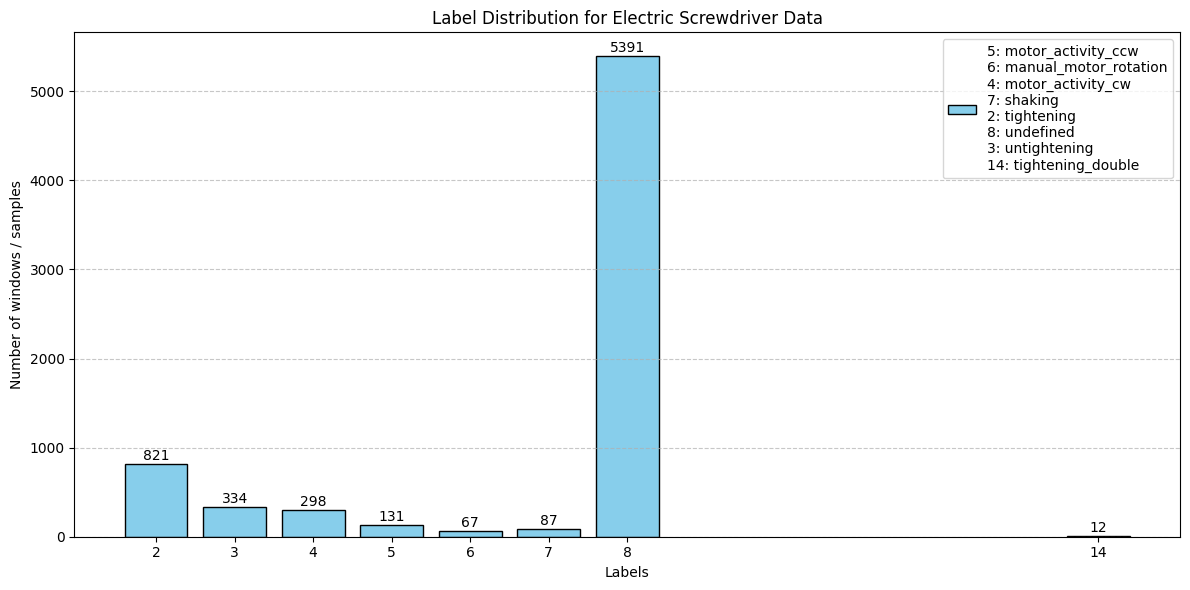

In [22]:
import matplotlib.pyplot as plt

# Use dynamic label mapping from data_dict
label_names = data_dict["01"]["classes"]

# Get unique labels and their counts
unique_labels, counts = np.unique(y_acc_f, return_counts=True)

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(unique_labels, counts, color='skyblue', edgecolor='black')

# Add annotations (counts) above each bar
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 10, str(count), 
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Labels')
plt.ylabel('Number of windows / samples')
plt.title('Label Distribution for Electric Screwdriver Data')
plt.xticks(unique_labels)

# Dynamically create legend entries from label_names
legend_entries = [f"{k}: {v}" for k, v in label_names.items()]
legend_text = '\n'.join(legend_entries)

# Add legend box with class descriptions
plt.gca().legend([legend_text], loc='upper right', frameon=True, fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [19]:
# Verify that the number of windows and window length are consistent
print(f"[INFO] {Xt_acc_f.shape[0]} windows with {Xt_acc_f[0].shape[0]} sample each (time stamps and 3 axis accelerometer)")
print(f"[INFO] {Xt_gyr_f.shape[0]} windows with {Xt_gyr_f[0].shape[0]} sample each (time stamps and 3 axis gyroscope)")
print(f"[INFO] {Xt_mag_f.shape[0]} windows with {Xt_mag_f[0].shape[0]} sample each (time stamps and 3 axis magnetometer)")
print(f"[INFO] {Xt_mic_f.shape[0]} windows with {Xt_mic_f[0].shape[0]} sample each (time stamps and 1 axis microphone)")

# assert Xt_acc_f.shape[0] == Xt_gyr_f.shape[0] == Xt_mag_f.shape[0], "Number of windows is not equal"


[INFO] 7141 windows with 41 sample each (time stamps and 3 axis accelerometer)
[INFO] 7141 windows with 41 sample each (time stamps and 3 axis gyroscope)
[INFO] 7141 windows with 62 sample each (time stamps and 3 axis magnetometer)
[INFO] 7141 windows with 3200 sample each (time stamps and 1 axis microphone)


### Code: Interpolation + Timestamp-aligned Downsampling

In [20]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import resample
import pandas as pd

# Assuming Xt_acc_f, Xt_gyr_f, Xt_mag_f, Xt_mic_f, y_acc_f are already loaded

# Determine the number of usable windows
num_windows = min(Xt_acc_f.shape[0], Xt_gyr_f.shape[0], Xt_mag_f.shape[0], Xt_mic_f.shape[0])
Xt_acc_f = Xt_acc_f[:num_windows]
Xt_gyr_f = Xt_gyr_f[:num_windows]
Xt_mag_f = Xt_mag_f[:num_windows]
Xt_mic_f = Xt_mic_f[:num_windows]
y_filtered = y_acc_f[:num_windows]

print(num_windows)

combined_data = []
combined_labels = []

target_length = 41  # downsample target

for i in range(num_windows):
    # Extract timestamps and values
    time_acc = Xt_acc_f[i][:, 0]
    acc_values = Xt_acc_f[i][:, 1:]

    time_gyr = Xt_gyr_f[i][:, 0]
    gyr_values = Xt_gyr_f[i][:, 1:]

    time_mag = Xt_mag_f[i][:, 0]
    mag_values = Xt_mag_f[i][:, 1:]

    time_mic = Xt_mic_f[i][:, 0]
    mic_values = Xt_mic_f[i][:, 1]

    # Use accelerometer timestamps as the reference time grid
    reference_time = time_acc

    # Interpolate each sensor to match the accelerometer's timestamps
    def safe_interp(original_time, values, target_time, num_axes=1):
        try:
            if num_axes == 1:
                f = interp1d(original_time, values, bounds_error=False, fill_value="extrapolate")
                return f(target_time).reshape(-1, 1)
            else:
                return np.stack([
                    interp1d(original_time, values[:, j], bounds_error=False, fill_value="extrapolate")(target_time)
                    for j in range(num_axes)
                ], axis=-1)
        except Exception as e:
            print(f"[WARN] Interpolation failed at window {i}: {e}")
            return np.full((len(target_time), num_axes), np.nan)

    acc_interp = acc_values  # already aligned
    gyr_interp = safe_interp(time_gyr, gyr_values, reference_time, 3)
    mag_interp = safe_interp(time_mag, mag_values, reference_time, 3)
    mic_interp = safe_interp(time_mic, mic_values, reference_time, 1)

    # Combine everything into one aligned signal: [t, acc, gyr, mag, mic]
    aligned = np.concatenate([
        reference_time.reshape(-1, 1),  # shape: (41, 1)
        acc_interp,
        gyr_interp,
        mag_interp,
        mic_interp
    ], axis=1)  # shape: (41, 11)

    # Downsample the aligned signal to target_length (still 41 in our case)
    aligned_downsampled = resample(aligned, target_length, axis=0)

    combined_data.append(aligned_downsampled)
    combined_labels.append(y_filtered[i])

# Final arrays
combined_data = np.array(combined_data)       # shape: (num_windows, 41, 11)
combined_labels = np.array(combined_labels)   # shape: (num_windows,)

print("[INFO] Combined data shape:", combined_data.shape)
print("[INFO] Combined label shape:", combined_labels.shape)
print("[INFO] Example entry (first window, first time step):", combined_data[0][0])

# Flatten combined_data to 2D
num_windows, time_steps, features = combined_data.shape
flattened_data = combined_data.reshape(num_windows, -1)

# Save data
data_df = pd.DataFrame(flattened_data)
data_df.to_csv('ES_InterDown_combined_data.csv', index=False)

# Save labels
labels_df = pd.DataFrame(combined_labels, columns=['label'])
labels_df.to_csv('ES_InterDown_combined_labels.csv', index=False)

7141
[INFO] Combined data shape: (7141, 41, 11)
[INFO] Combined label shape: (7141,)
[INFO] Example entry (first window, first time step): [ 1.59422628e+09 -5.87737800e+00  1.32205100e+00  8.61249100e+00
 -1.06526400e-02  1.17179100e-02 -2.13052900e-02  2.26842736e-04
  5.35707827e-05 -6.92888209e-04  7.00000000e+00]


### Code with Downsampling to 41 Samples

In [21]:
# from scipy.signal import resample

# # Assuming Xt_acc_f, Xt_gyr_f (7259 × 41),
# # Xt_mag_f (7219 × 62), Xt_mic_f (7185 × 3200), and y_acc_f are loaded

# # Trim all datasets to the smallest common window count
# num_windows = min(Xt_acc_f.shape[0], Xt_gyr_f.shape[0], Xt_mag_f.shape[0], Xt_mic_f.shape[0])
# Xt_acc_f = Xt_acc_f[:num_windows]
# Xt_gyr_f = Xt_gyr_f[:num_windows]
# Xt_mag_f = Xt_mag_f[:num_windows]
# Xt_mic_f = Xt_mic_f[:num_windows]
# y_filtered = y_acc_f[:num_windows]

# combined_data = []
# combined_labels = []
# target_length = 41  # downsample everything to 41 samples

# for i in range(num_windows):
#     # Separate timestamps and values
#     time_acc = Xt_acc_f[i][:, 0]
#     acc_values = Xt_acc_f[i][:, 1:]  # shape: (41, 3)

#     time_gyr = Xt_gyr_f[i][:, 0]
#     gyr_values = Xt_gyr_f[i][:, 1:]  # shape: (41, 3)

#     time_mag = Xt_mag_f[i][:, 0]
#     mag_values = Xt_mag_f[i][:, 1:]  # shape: (62, 3)

#     time_mic = Xt_mic_f[i][:, 0]
#     mic_values = Xt_mic_f[i][:, 1]   # shape: (3200,)

#     # Downsample magnetometer to 41 samples
#     mag_downsampled = resample(mag_values, target_length)

#     # Downsample microphone to 41 samples (keep as (41, 1))
#     mic_downsampled = resample(mic_values, target_length).reshape(-1, 1)

#     # Use accelerometer timestamps as the unified time vector
#     new_time = time_acc.reshape(-1, 1)

#     # Combine all features (shape: 41 × (1 + 3 + 3 + 3 + 1) = 41 × 11)
#     combined_features = np.concatenate(
#         (new_time, acc_values, gyr_values, mag_downsampled, mic_downsampled),
#         axis=1
#     )
#     combined_data.append(combined_features)
#     combined_labels.append(y_filtered[i])

# # Final array shapes
# combined_data = np.array(combined_data)       # shape: (num_windows, 41, 11)
# combined_labels = np.array(combined_labels)   # shape: (num_windows,)

In [22]:
print("[INFO] Shape of combined data:", combined_data.shape)
print("[INFO] Shape of combined labels:", combined_labels.shape)
print("[INFO] Feature example (first window, first step):", combined_data[0][0])
print("[INFO] First label:", combined_labels[0])

[INFO] Shape of combined data: (7141, 41, 11)
[INFO] Shape of combined labels: (7141,)
[INFO] Feature example (first window, first step): [ 1.59422628e+09 -5.87737800e+00  1.32205100e+00  8.61249100e+00
 -1.06526400e-02  1.17179100e-02 -2.13052900e-02  2.26842736e-04
  5.35707827e-05 -6.92888209e-04  7.00000000e+00]
[INFO] First label: 8


## Code for upsampling

In [23]:
# import numpy as np
# from scipy.interpolate import interp1d

# # Assuming Xt_acc_f, Xt_gyr_f (number of windows >= 7219, 41 samples),
# # Xt_mag_f (7219 windows, 62 samples), and y_acc_f (number of windows >= 7219) are loaded

# num_windows = min(Xt_acc_f.shape[0], Xt_gyr_f.shape[0], Xt_mag_f.shape[0])
# Xt_acc_f = Xt_acc_f[:num_windows]
# Xt_gyr_f = Xt_gyr_f[:num_windows]
# Xt_mag_f = Xt_mag_f[:num_windows]
# y_filtered = y_acc_f[:num_windows] # Assuming y_acc_f is the correct label set

# combined_data = []
# combined_labels = []
# target_length = 62

# for i in range(num_windows):
#     time_acc = Xt_acc_f[i][:, 0]
#     acc_values = Xt_acc_f[i][:, 1:]
#     time_gyr = Xt_gyr_f[i][:, 0]
#     gyr_values = Xt_gyr_f[i][:, 1:]
#     time_mag = Xt_mag_f[i][:, 0]
#     mag_values = Xt_mag_f[i][:, 1:]

#     # Create interpolation functions for each sensor axis
#     interp_acc = [interp1d(time_acc, acc_values[:, j], fill_value="extrapolate") for j in range(3)]
#     interp_gyr = [interp1d(time_gyr, gyr_values[:, j], fill_value="extrapolate") for j in range(3)]
#     interp_mag = [interp1d(time_mag, mag_values[:, j], fill_value="extrapolate") for j in range(3)]

#     # Create a new time vector of the target length (using the time range of the longest sequence)
#     start_time = min(time_acc[0], time_gyr[0], time_mag[0])
#     end_time = max(time_acc[-1], time_gyr[-1], time_mag[-1])
#     new_time = np.linspace(start_time, end_time, target_length)

#     # Interpolate the sensor values at the new time points
#     resampled_acc = np.array([interp_acc[j](new_time) for j in range(3)]).T
#     resampled_gyr = np.array([interp_gyr[j](new_time) for j in range(3)]).T
#     resampled_mag = np.array([interp_mag[j](new_time) for j in range(3)]).T

#     # Combine the timestamp and resampled sensor data
#     combined_features = np.concatenate((new_time[:, np.newaxis], resampled_acc, resampled_gyr, resampled_mag), axis=1)
#     combined_data.append(combined_features)
#     combined_labels.append(y_filtered[i])

# combined_data = np.array(combined_data)
# combined_labels = np.array(combined_labels)

# print("[INFO] Shape of combined data:", combined_data.shape)
# print("[INFO] Shape of combined labels:", combined_labels.shape)
# print("[INFO] Example of combined data for the first window, first time step:")
# print(combined_data[0][0])
# print("[INFO] Example of the first combined label:")
# print(combined_labels[0])

# # Now you can proceed with splitting and scaling this combined_data

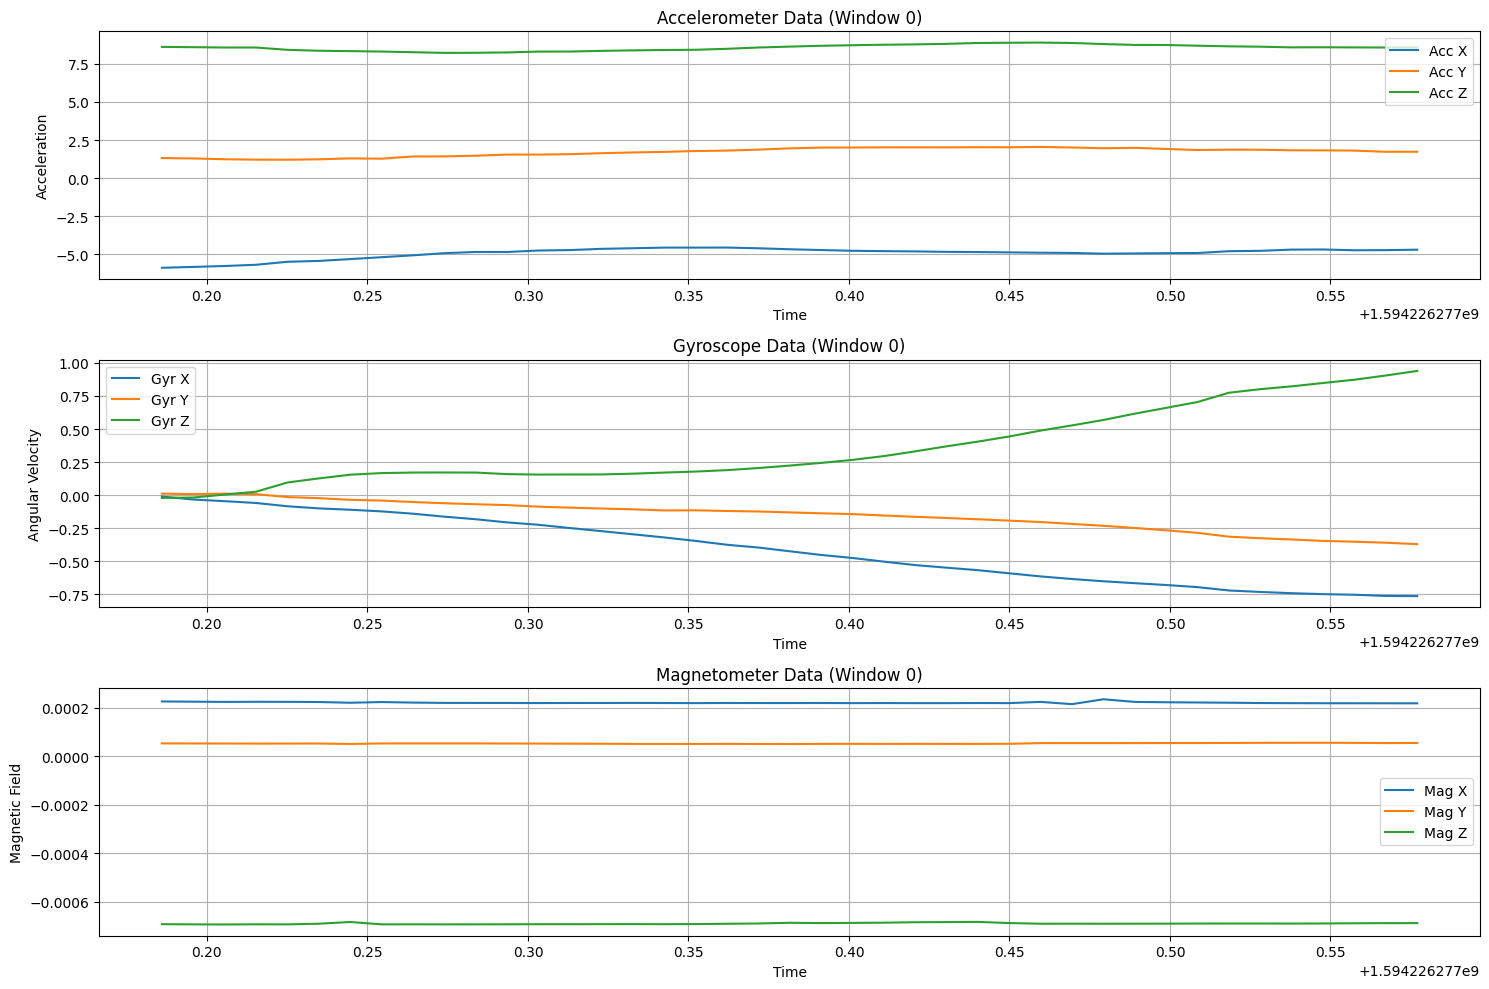

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'combined_data' is your NumPy array of shape (num_windows, time_steps, features)

# Select the first window
window_index = 0
time = combined_data[window_index][:, 0]
acc_x = combined_data[window_index][:, 1]
acc_y = combined_data[window_index][:, 2]
acc_z = combined_data[window_index][:, 3]
gyr_x = combined_data[window_index][:, 4]
gyr_y = combined_data[window_index][:, 5]
gyr_z = combined_data[window_index][:, 6]
mag_x = combined_data[window_index][:, 7]
mag_y = combined_data[window_index][:, 8]
mag_z = combined_data[window_index][:, 9]

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(time, acc_x, label='Acc X')
plt.plot(time, acc_y, label='Acc Y')
plt.plot(time, acc_z, label='Acc Z')
plt.title(f'Accelerometer Data (Window {window_index})')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(time, gyr_x, label='Gyr X')
plt.plot(time, gyr_y, label='Gyr Y')
plt.plot(time, gyr_z, label='Gyr Z')
plt.title(f'Gyroscope Data (Window {window_index})')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(time, mag_x, label='Mag X')
plt.plot(time, mag_y, label='Mag Y')
plt.plot(time, mag_z, label='Mag Z')
plt.title(f'Magnetometer Data (Window {window_index})')
plt.xlabel('Time')
plt.ylabel('Magnetic Field')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# You can also plot other windows by changing the 'window_index' variable